## Lista 7 - Exercício de Mineração de texto

Aluna: Maria Eduarda Guedes Pinto Gianisella

RA: 2375087

#### Questão 1 

Use o dataset "tweets_trump.csv", que contém todos os tweets do D. Trump e faça o que é pedido abaixo.

a) Utilizando o texto dos tweets identifique 5 tópicos latentes com o LDA, com um preprocessamento básico -- remoção de urls, remoção de pontuação, stemming e conversão para minúsculo. 

b) Avalie os tópicos encontrados. Algum preprocessamento a mais poderia ser útil para a produção de um melhor resultado?


In [1]:
import pandas as pd

df = pd.read_csv('tweets_trump.csv')
print(df.head())

                    id                                               text  \
0    98454970654916608  Republicans and Democrats have both created ou...   
1  1234653427789070336  I was thrilled to be back in the Great city of...   
2  1218010753434820614  RT @CBS_Herridge: READ: Letter to surveillance...   
3  1304875170860015617  The Unsolicited Mail In Ballot Scam is a major...   
4  1218159531554897920  RT @MZHemingway: Very friendly telling of even...   

  isRetweet isDeleted              device  favorites  retweets  \
0         f         f           TweetDeck         49       255   
1         f         f  Twitter for iPhone      73748     17404   
2         t         f  Twitter for iPhone          0      7396   
3         f         f  Twitter for iPhone      80527     23502   
4         t         f  Twitter for iPhone          0      9081   

                  date isFlagged  
0  2011-08-02 18:07:48         f  
1  2020-03-03 01:34:50         f  
2  2020-01-17 03:22:47         f  


In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess
from gensim import corpora

import nltk
nltk.download('punkt')
nltk.download('stopwords')

def preprocess(text):
    # Remover URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remover pontuação
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # Converter para minúsculas
    text = text.lower()
    # Tokenização
    tokens = word_tokenize(text)
    # Remover stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens

df['processed_tweet'] = df['text'].apply(preprocess)

print(df['processed_tweet'].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       [republican, democrat, creat, econom, problem]
1    [thrill, back, great, citi, charlott, north, c...
2    [rt, cbs_herridg, read, letter, surveil, court...
3    [unsolicit, mail, ballot, scam, major, threat,...
4    [rt, mzhemingway, friendli, tell, event, comey...
Name: processed_tweet, dtype: object


In [6]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

texts = df['processed_tweet'].tolist()
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.079*"realdonaldtrump" + 0.077*"rt" + 0.050*"thank" + 0.038*"presid" + 0.027*"trump"')
(1, '0.017*"news" + 0.014*"fake" + 0.012*"media" + 0.010*"report" + 0.009*"amp"')
(2, '0.048*"great" + 0.014*"new" + 0.010*"big" + 0.009*"look" + 0.009*"amp"')
(3, '0.039*"rt" + 0.032*"trump" + 0.008*"true" + 0.007*"donald" + 0.006*"via"')
(4, '0.014*"amp" + 0.013*"countri" + 0.012*"border" + 0.012*"democrat" + 0.011*"peopl"')


In [7]:
for idx, topic in lda_model.print_topics(-1):
    print(f'Tópico {idx}: {topic}')


Tópico 0: 0.079*"realdonaldtrump" + 0.077*"rt" + 0.050*"thank" + 0.038*"presid" + 0.027*"trump" + 0.013*"whitehous" + 0.010*"great" + 0.010*"honor" + 0.009*"run" + 0.009*"today"
Tópico 1: 0.017*"news" + 0.014*"fake" + 0.012*"media" + 0.010*"report" + 0.009*"amp" + 0.009*"hillari" + 0.008*"never" + 0.007*"collus" + 0.007*"foxnew" + 0.007*"rate"
Tópico 2: 0.048*"great" + 0.014*"new" + 0.010*"big" + 0.009*"look" + 0.009*"amp" + 0.009*"job" + 0.009*"make" + 0.008*"hunt" + 0.008*"witch" + 0.008*"north"
Tópico 3: 0.039*"rt" + 0.032*"trump" + 0.008*"true" + 0.007*"donald" + 0.006*"via" + 0.006*"comey" + 0.006*"amp" + 0.005*"new" + 0.005*"2016" + 0.004*"like"
Tópico 4: 0.014*"amp" + 0.013*"countri" + 0.012*"border" + 0.012*"democrat" + 0.011*"peopl" + 0.011*"us" + 0.009*"state" + 0.008*"want" + 0.008*"presid" + 0.008*"get"


## Interpretação dos resultados

### Tópico 0
**Palavras-chave:** "realdonaldtrump", "rt", "thank", "presid", "trump", "whitehous", "great", "honor", "run", "today"
- Provavelmente está relacionado a menções do perfil de Donald Trump, agradecimentos e atividades presidenciais. A palavra "rt" mostra que muitos tweets incluem retweets.
### Tópico 1
**Palavras-chave:** "news", "fake", "media", "report", "amp", "hillari", "never", "collus", "foxnew", "rate"
- Tem relação com a mídia, fake news e Hillary Clinton.
### Tópico 2
**Palavras-chave:** "great", "new", "big", "look", "amp", "job", "make", "hunt", "witch", "north"
- Parece ser sobre situações e feitos importantes da sua presidência, por conta das palavras "great", "job", "make".
### Tópico 3
**Palavras-chave:** "rt", "trump", "true", "donald", "via", "comey", "amp", "new", "2016", "like"
- Referências a retweets e ao Trump. Também menciona o ex-diretor do FBI James Comey e eventos de 2016. Provavelmente está relacionado as eleições de 2016 e as investigações de fake news que foram feitas.
### Tópico 4
**Palavras-chave:** "amp", "countri", "border", "democrat", "peopl", "us", "state", "want", "presid", "get"
- Este tópico parece focar em política, fronteiras e questões democráticas.

### Melhorias
Para produzir melhores resultados, algumas melhorias adicionais no pré-processamento podem ser úteis, como:

- **Remover Palavras de Alta Frequência:** A palavra "amp" é comum nos textos e deve ser removida. Palavras como "rt" (retweet) e "realdonaldtrump" (nome de usuário do Donal Trump) são muito frequentes e podem ser removidas para melhor clareza.
- **Remover Palavras Muito Comuns e Pouco Informativas:** Palavras extremamente comuns, como "thank", "today", "new", podem ser removidas para focar mais nos termos específicos e relevantes.

## Questão 2

Use o dataset "tweets_trump.csv" e responda:

a) Qual o sentimento dos 5 tweets com maior número de retweets?

b) Faça uma análise do sentimento geral de todos os tweets. Para isso, visualize a distribuição de polaridade para embasar a sua resposta.

In [11]:
df = pd.read_csv('tweets_trump.csv')
print(df.columns)
print(df.head())

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
                    id                                               text  \
0    98454970654916608  Republicans and Democrats have both created ou...   
1  1234653427789070336  I was thrilled to be back in the Great city of...   
2  1218010753434820614  RT @CBS_Herridge: READ: Letter to surveillance...   
3  1304875170860015617  The Unsolicited Mail In Ballot Scam is a major...   
4  1218159531554897920  RT @MZHemingway: Very friendly telling of even...   

  isRetweet isDeleted              device  favorites  retweets  \
0         f         f           TweetDeck         49       255   
1         f         f  Twitter for iPhone      73748     17404   
2         t         f  Twitter for iPhone          0      7396   
3         f         f  Twitter for iPhone      80527     23502   
4         t         f  Twitter for iPhone          0      9081   

       

In [12]:
from textblob import TextBlob

# Identificar os 5 tweets com maior número de retweets
top_retweets = df.nlargest(5, 'retweets')

# Analisar o sentimento dos 5 tweets com maior número de retweets
top_retweets['sentiment'] = top_retweets['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
print("Sentimento dos 5 tweets com maior número de retweets:")
print(top_retweets[['text', 'retweets', 'sentiment']])


Sentimento dos 5 tweets com maior número de retweets:
                                                    text  retweets  sentiment
11759  Tonight, @FLOTUS and I tested positive for COV...    408866   0.284091
35620         #FraudNewsCNN #FNN https://t.co/WYUnHjjUjg    293109   0.000000
39347                 TODAY WE MAKE AMERICA GREAT AGAIN!    281289   1.000000
29598  Are you allowed to impeach a president for gro...    237674   0.000000
9080        RT @SpaceX: Liftoff! https://t.co/DRBfdUM7JA    235250   0.000000


**Tweet:** "Tonight, @FLOTUS and I tested positive for COVID-19. We will begin our quarantine and recovery process immediately. We will get through this TOGETHER!"
- Retweets: 408,866
- Sentimento: 0.284091 (Moderadamente positivo)

**Tweet:** "#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg"
- Retweets: 293,109
- Sentimento: 0.000000 (Neutro)

**Tweet:** "TODAY WE MAKE AMERICA GREAT AGAIN!"
- Retweets: 281,289
- Sentimento: 1.000000 (Muito positivo)

**Tweet:** "Are you allowed to impeach a president for gross incompetence?"
- Retweets: 237,674
- Sentimento: 0.000000 (Neutro)

**Tweet:** "RT @SpaceX: Liftoff! https://t.co/DRBfdUM7JA"
- Retweets: 235,250
- Sentimento: 0.000000 (Neutro)

## Análise

Entre os tweets mais retweetados, alguns são neutros (polaridade de 0.0), como o tweet sobre a "FraudNewsCNN" e o retweet do SpaceX.
O tweet mais positivo é "TODAY WE MAKE AMERICA GREAT AGAIN!" com uma polaridade de 1.0, refletindo um tom muito positivo.
O tweet sobre testar positivo para COVID-19 tem uma polaridade moderadamente positiva (0.284091), possivelmente devido ao tom de otimismo e unidade ("We will get through this TOGETHER!").

Os tweets mais retweetados incluem tanto mensagens otimistas quanto declarações neutras, refletindo a diversidade de temas em suas postagens.

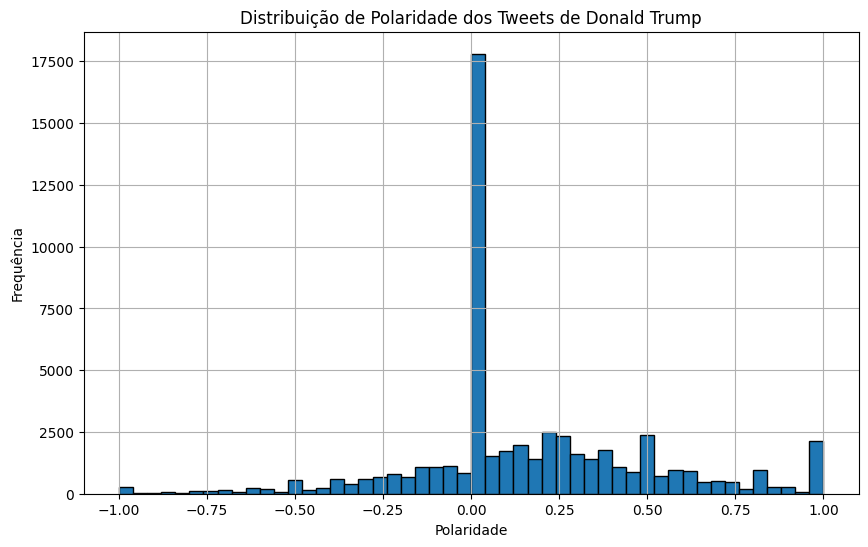

In [14]:
import matplotlib.pyplot as plt

df['sentiment'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

plt.figure(figsize=(10, 6))
df['sentiment'].hist(bins=50, edgecolor='black')
plt.title('Distribuição de Polaridade dos Tweets de Donald Trump')
plt.xlabel('Polaridade')
plt.ylabel('Frequência')
plt.show()

A maioria dos tweets tem uma polaridade próxima de zero, indicando um sentimento neutro ou levemente polarizado. Além disso, há uma distribuição razoável de tweets com polaridades negativas e um pouco mais positivas, mostrando que os tweets variam em termos de sentimento.

A análise mostra que os tweets de Donald Trump têm uma ampla variedade de sentimentos, desde neutros até muito positivos, com uma maioria de tweets neutros.